In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from IPython.display import display, clear_output
import datetime
import timeit


In [2]:
#relevant constants
gr = 1/5
gp = 1/30
kr=1
kp=gp*1e4/5
dt = 0.001

In [4]:
print(kp)

66.66666666666666


In [6]:
def pcr(r,p):
    return dt*kr
def pdr(r,p):
    return dt*gr*r
def pcp(r,p):
    return dt*kp*r
def pdp(r,p):
    return dt*gp*p


In [5]:

t = [0]
p=[0]
r=[0]
while(t[-1]<140):
    # gen random numbers to decide
    # if events will happen or not
    r1 = np.random.random()
    r2 = np.random.random()
    r3 = np.random.random()
    r4 = np.random.random()
    
    newr,newp = 0,0
    if r1 < pcr(r[-1],p[-1]) :
        newr+=1
    if r2 < pdr(r[-1],p[-1]) :
        newr-=1
    if r3 < pcp(r[-1],p[-1]) :
        newp+=1
    if r4 < pdp(r[-1],p[-1]) :
        newp-=1
        
    p.append(p[-1]+newp)
    r.append(r[-1]+newr)
        
    t.append(t[-1]+dt)

# 3.a

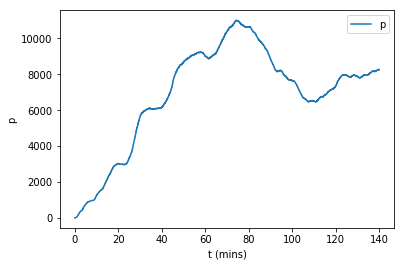

In [25]:
fig = plt.figure(figsize=(6,4))
plt.step(t,p,label='p')
plt.legend()
plt.xlabel('t (mins)')
plt.ylabel('p')
plt.savefig('3ap.png')

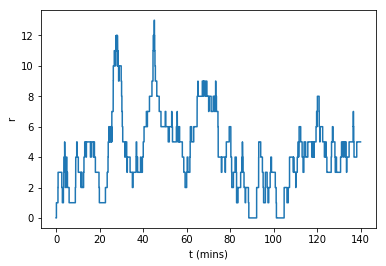

In [26]:
fig = plt.figure(figsize=(6,4))
plt.step(t,r,label ='r')
plt.xlabel('t (mins)')
plt.ylabel('r')
plt.savefig('3ar.png')

# 3.b

In [7]:

def oneRun():
    t = [0]
    p=[0]
    r=[0]
    while(t[-1]<140):
        # gen random numbers to decide
        # if events will happen or not
        r1 = np.random.random()
        r2 = np.random.random()
        r3 = np.random.random()
        r4 = np.random.random()

        newr,newp = 0,0
        if r1 < pcr(r[-1],p[-1]) :
            newr+=1
        if r2 < pdr(r[-1],p[-1]) :
            newr-=1
        if r3 < pcp(r[-1],p[-1]) :
            newp+=1
        if r4 < pdp(r[-1],p[-1]) :
            newp-=1

        p.append(p[-1]+newp)
        r.append(r[-1]+newr)

        t.append(t[-1]+dt)
    return t,p,r

In [8]:

iterations = 500
ps = []
rs = []
ts = []
for i in range(iterations):
    print('\r', '{:.2f}%'.format(i*100/iterations), end='')
    t,p,r = oneRun()
    ts.append(t)
    rs.append(r)
    ps.append(p)

 99.80%

 99.80%

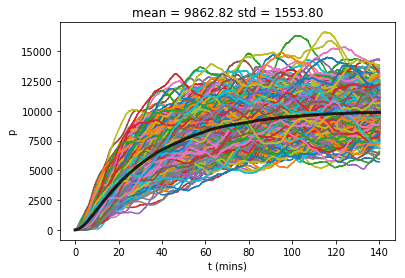

In [10]:
fig = plt.figure(figsize=(6,4))
for i in range(int(iterations)):
    print('\r', '{:.2f}%'.format(i*100/iterations), end='')
    plt.step(ts[i],ps[i],)
#     plt.legend()
plt.plot(ts[0],np.mean(ps,axis=0),c='black',linewidth=3,alpha=0.8)
plt.title("mean = {:.2f} std = {:.2f}".format(np.mean(ps,axis=0)[-1],np.std(ps,axis=0)[-1]))
plt.xlabel('t (mins)')
plt.ylabel('p')
plt.savefig('3bp.png')

In [15]:
len(np.mean(ps,axis=1))

500

 99.80%

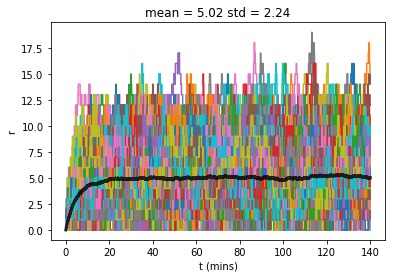

In [29]:
fig = plt.figure(figsize=(6,4))
for i in range(iterations):
    print('\r', '{:.2f}%'.format(i*100/iterations), end='')
    plt.step(ts[i],rs[i],)
#     plt.legend()

plt.plot(ts[0],np.mean(rs,axis=0),c='black',linewidth=3,alpha=0.8)
plt.title("mean = {:.2f} std = {:.2f}".format(np.mean(rs,axis=0)[-1],np.std(rs,axis=0)[-1]))
plt.xlabel('t (mins)')
plt.ylabel('r')
plt.savefig('3br.png')

# 3c

## 3c- parte A 

## 3c- parte A 

In [6]:
#relevant constants
gr = 1/5
gp = 1/30
kr=1
kp=gp*1e4/5
# dt = 0.001


In [13]:
def oneRun():
    t = [0]
    p=[0]
    r=[0]
    while(t[-1]<140):
        # gen random numbers to decide
        # if events will happen or not
        r1 = np.random.random()
        r2 = np.random.random()
        r3 = np.random.random()
        r4 = np.random.random()

        newr,newp = 0,0
        if r1 < pcr(r[-1],p[-1]) :
            newr+=1
        if r2 < pdr(r[-1],p[-1]) :
            newr-=1
        if r3 < pcp(r[-1],p[-1]) :
            newp+=1
        if r4 < pdp(r[-1],p[-1]) :
            newp-=1

        p.append(p[-1]+newp)
        r.append(r[-1]+newr)

        t.append(t[-1]+dt)
    return t,p,r

In [15]:
dts = []
errors = []

 99.00% done

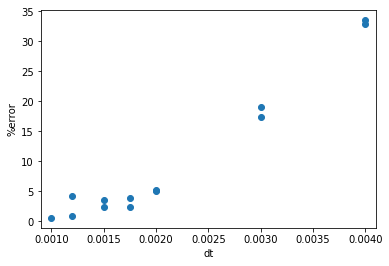

In [30]:
dt = 0.004
iterations = 100
ps = []
rs = []
ts = []
for i in range(iterations):
    print('\r', '{:.2f}% done'.format(i*100/iterations), end='')
    t,p,r = oneRun()
    ts.append(t)
    rs.append(r)
    ps.append(p)
    
dts.append(dt)
errors.append(abs(np.mean(ps,axis=0)[-1]-1e4)*100/1e4)

fig = plt.figure(figsize=(6,4))
plt.scatter(dts,errors)
plt.xlim(min(dts)-0.0001,max(dts)+0.0001)
plt.xlabel('dt')
plt.ylabel('%error')
plt.savefig('3c1.png')

4.159400000000005
 99.00% done

Text(0,0.5,'p')

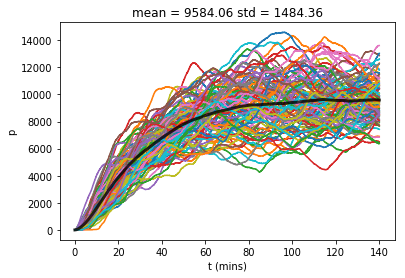

In [24]:
print(abs(np.mean(ps,axis=0)[-1]-1e4)*100/1e4)

fig = plt.figure(figsize=(6,4))
for i in range(int(iterations)):
    print('\r', '{:.2f}% done'.format(i*100/iterations), end='')
    plt.step(ts[i],ps[i],)
#     plt.legend()
plt.plot(ts[0],np.mean(ps,axis=0),c='black',linewidth=3,alpha=0.8)
plt.title("mean = {:.2f} std = {:.2f}".format(np.mean(ps,axis=0)[-1],np.std(ps,axis=0)[-1]))
plt.xlabel('t (mins)')
plt.ylabel('p')


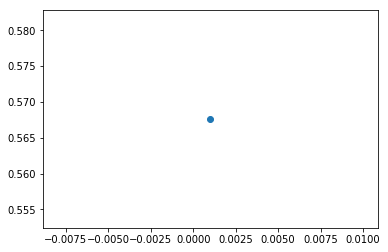

## 3c- parte B 

In [9]:
start = timeit.default_timer()
dt=0.001
iterations = 1000
ps = []
rs = []
ts = []
for i in range(iterations):
    print('\r', '{:.2f}% done'.format(i*100/iterations), end='')
    t,p,r = oneRun()
    ts.append(t)
    rs.append(r)
    ps.append(p)
stop = timeit.default_timer()
print('')
print('-'[0]*20)
print('Time: ', stop - start)  

 99.90% done
--------------------
Time:  351.0205192620001


# 3d

In [9]:
#relevant constants
gr = 1/5
gp = 1/30
kr=1
kp=gp*1e4/5
dt = 0.001
K=900

In [10]:
rss = (kp-1)**0.5 * K*gr/kp
pss = kp*rss/gp
print(pss)

43758.88481211558


In [11]:
def pcr(r,p):
    return dt*kr/(1+ (p/K)**2)
def pdr(r,p):
    return dt*gr*r
def pcp(r,p):
    return dt*kp*r
def pdp(r,p):
    return dt*gp*p


In [12]:

def oneRun():
    t = [0]
    p=[0]
    r=[0]
    while(t[-1]<140):
        # gen random numbers to decide
        # if events will happen or not
        r1 = np.random.random()
        r2 = np.random.random()
        r3 = np.random.random()
        r4 = np.random.random()

        newr,newp = 0,0
        if r1 < pcr(r[-1],p[-1]) :
            newr+=1
        if r2 < pdr(r[-1],p[-1]) :
            newr-=1
        if r3 < pcp(r[-1],p[-1]) :
            newp+=1
        if r4 < pdp(r[-1],p[-1]) :
            newp-=1

        p.append(p[-1]+newp)
        r.append(r[-1]+newr)

        t.append(t[-1]+dt)
    return t,p,r

In [13]:

iterations = 500
ps = []
rs = []
ts = []
for i in range(iterations):
    print('\r', '{:.2f}%'.format(i*100/iterations), end='')
    t,p,r = oneRun()
    ts.append(t)
    rs.append(r)
    ps.append(p)
    
    

 99.80%

 99.80%

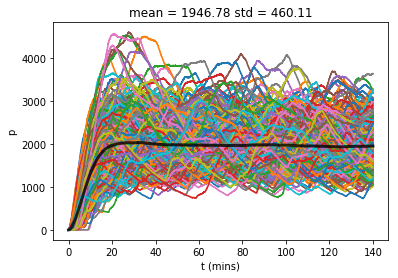

In [14]:
fig = plt.figure(figsize=(6,4))
for i in range(int(iterations)):
    print('\r', '{:.2f}%'.format(i*100/iterations), end='')
    plt.step(ts[i],ps[i],)
#     plt.legend()
plt.plot(ts[0],np.mean(ps,axis=0),c='black',linewidth=3,alpha=0.8)
plt.title("mean = {:.2f} std = {:.2f}".format(np.mean(ps,axis=0)[-1],np.std(ps,axis=0)[-1]))
plt.xlabel('t (mins)')
plt.ylabel('p')
plt.savefig('3dp.png')

In [ ]:
fig = plt.figure(figsize=(6,4))
for i in range(iterations):
    print('\r', '{:.2f}%'.format(i*100/iterations), end='')
    plt.step(ts[i],rs[i],)
#     plt.legend()

plt.plot(ts[0],np.mean(rs,axis=0),c='black',linewidth=3,alpha=0.8)
plt.title("mean = {:.2f} std = {:.2f}".format(np.mean(rs,axis=0)[-1],np.std(rs,axis=0)[-1]))
plt.xlabel('t (mins)')
plt.ylabel('r')
plt.savefig('3dr.png')